In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
#import scipy.stats as ss
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression, Lasso
#from sklearn.metrics import mean_squared_error, r2_score
#from math import sqrt
#from sklearn.metrics.pairwise import cosine_similarity
#from collections import defaultdict
#from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#from sklearn.utils import shuffle
#from sklearn.externals import joblib
#import time
#from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

%matplotlib inline

In [2]:
classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,Female,Age40,AssetLow,RetirementSavingLow,IncomeLow,DebtLow,Self-Emp,EducationLessCol,Age50,Age60,...,IncomeModest,IncomeModerate,IncomeHigh,DebtMid,DebtHigh,Employeed,NotInPaid,Retired,College,Classi
0,1,0,0,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,1,0,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,1
4,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1


In [5]:
df2 = df.iloc[:1353,:]

In [6]:
to_drop = ['Age40', 'AssetLow','RetirementSavingLow', 'IncomeLow','DebtLow','Self-Emp','Female','College','DebtHigh','Retired']
df2 = df2.drop(to_drop, axis=1)
#df2

In [7]:
df2 = df2.sample(frac=1)

In [8]:
for i in range(len(df2.Classi)):
    if df2.Classi[i] == 2:
        df2.Classi[i] = 0

In [9]:
df2.tail()

,EducationLessCol,Age50,Age60,Age70,AssetMid,AssetHigh,RetirementSavingMid,RetirementSavingHigh,IncomeModest,IncomeModerate,IncomeHigh,DebtMid,Employeed,NotInPaid,Classi
1284,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
331,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1
562,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0
337,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1081,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0


In [10]:
X, y = df2.loc[:,'EducationLessCol':'NotInPaid'], df2.Classi

In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

## SVM

In [12]:
#start svm
clf = svm.SVC(C=10.0,probability=True)
clf.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_preds = clf.predict(X_test)
#end svm ,start metrics 
test_auc = metrics.roc_auc_score(y_test, y_preds)
print(test_auc)

0.5566413662239089


## PCA

In [15]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
sc.fit(X_test)

X_test_std = sc.transform(X_test)

In [16]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

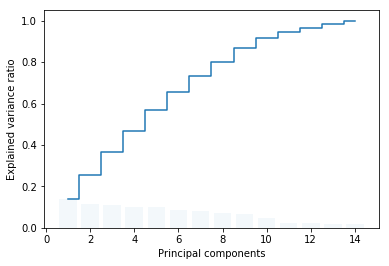

In [19]:
plt.bar(range(1, 15),pca.explained_variance_ratio_, alpha=0.05, align='center')
plt.step(range(1, 15), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [21]:
pca.explained_variance_ratio_[:6].sum()

0.6541178221040065

## 6 principal components

In [22]:
n_components=6
pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.fit_transform(X_test_std)

## test model accuracy

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train_pca, y_train)
yhat = logreg.predict(X_train_pca)

In [24]:
test_auc = metrics.roc_auc_score(y_train, yhat)
print(test_auc)

0.5037940444274224


## XGBoost

In [25]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [26]:
#try
model_xgb = xgb.XGBRegressor(n_estimators=500, colsample_bytree=0.8,colsample_bylevel=0.2,
                             min_child_weight=2,max_depth=5,objective='binary:logistic',
                            learning_rate=0.08,reg_alpha=0.8, reg_lambda=0.5) 
model_xgb.fit(X_train, y_train)
# make prediction
y_pred = model_xgb.predict(X_test)

test_auc = metrics.roc_auc_score(y_test, y_pred)
print(test_auc)
#check if overfitting
model_xgb.fit(X_test, y_test)
y_pred = model_xgb.predict(X_train)
test_auc = metrics.roc_auc_score(y_train, y_pred)
print(test_auc)
# 0.8203366643527469
model_xgb.fit(X_train, y_train)
xgb_preds = model_xgb.predict(X_test)
# solution = pd.DataFrame({"id":df_test.Id, "Y":xgb_preds})
# solution.to_csv("xgb_sol.csv", index = False)

0.6556609740670463
0.6254468275245755


## Random Forest

In [27]:
# Use simple random forest model for prediction
classifier_RF = RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train, y_train)

# predict class labels 0/1 for the test set
predicted = classifier_RF.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

# generate evaluation metrics
print("%s: %r" % ("accuracy_score is: ", accuracy_score(y_test, predicted)))
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
print("%s: %r" % ("f1_score is: ", f1_score(y_test, predicted )))#string to int

print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, predicted)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)

# print ("recall is", float(cm[1,1])/(cm[1,0]+cm[1,1]))
# print ("precision is" , float(cm[1,1])/(cm[1,1] + cm[0,1])

accuracy_score is: : 0.6900369003690037
roc_auc_score is: : 0.6148640101201771
f1_score is: : 0.4084507042253521
confusion_matrix is: 
        pred_0  pred_1
true_0     158      28
true_1      56      29


In [29]:
import numpy as np
from sklearn import model_selection

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.696
Model accuracy of KNN is: 0.627
Model accuracy of Random Forest is: 0.627


In [30]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
#     print ("Best score: %0.3f" % gs.best_score_)
#     print ("Best parameters set:")
    print(gs.best_estimator_.coef_)
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [31]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print_grid_search_metrics(Grid_LR)

[[-0.13669773 -0.08217756  0.37241582  0.25782675 -0.04984051  0.26493722
   0.56814646  1.1996345   0.06163815  0.21229557 -0.05788131 -0.29119391
  -0.43473735 -0.75222899]]
	C: 1
	penalty: 'l1'


In [33]:
best_LR_model = Grid_LR.best_estimator_

In [34]:
best_LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [36]:
print_grid_search_metrics(Grid_KNN)

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

In [37]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [38]:
print_grid_search_metrics(Grid_RF)

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [39]:
best_RF_model = Grid_RF.best_estimator_

In [40]:
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Low risk','High risk']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.690
precision is: 0.510
recall is: 0.306


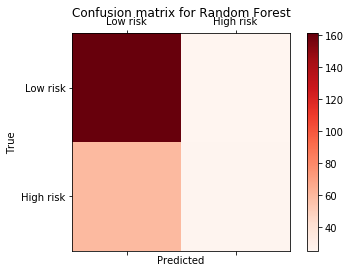

Logistic Regression
Accuracy is: 0.708
precision is: 0.650
recall is: 0.153


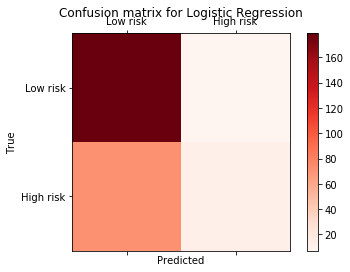

In [41]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

In [42]:
print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, best_RF_model.predict(X_test))
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)

confusion_matrix is: 
        pred_0  pred_1
true_0     161      25
true_1      59      26


In [43]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

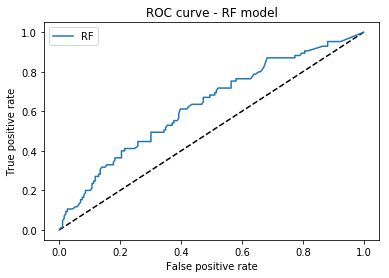

In [44]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [47]:
to_drop = ['IncomeHigh','IncomeModest']
df2 = df2.drop(to_drop, axis=1)
df2.head(3)

,EducationLessCol,Age50,Age60,Age70,AssetMid,AssetHigh,RetirementSavingMid,RetirementSavingHigh,IncomeModerate,DebtMid,Employeed,NotInPaid,Classi
394,1,1,0,0,0,1,0,1,0,0,0,0,1
7,0,0,0,0,0,1,0,0,0,0,1,0,1
558,0,1,0,0,0,1,1,0,0,0,0,0,0


In [48]:
df2 = df2.sample(frac=1)
df2.tail(3)

In [51]:
X, y = df2.loc[:,'EducationLessCol':'NotInPaid'], df2.Classi
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
#start svm
clf = svm.SVC(C=10.0,probability=True)
clf.fit(X_train,y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
y_preds = clf.predict(X_test)
#end svm ,start metrics 
test_auc = metrics.roc_auc_score(y_test, y_preds)
print(test_auc)

0.5221417585234556


# Random Forest

In [54]:
# Use simple random forest model for prediction
classifier_RF = RandomForestClassifier(random_state=0)

classifier_RF.fit(X_train, y_train)

# predict class labels 0/1 for the test set
predicted = classifier_RF.predict(X_test)

# generate class probabilities
probs = classifier_RF.predict_proba(X_test)

# generate evaluation metrics
print("%s: %r" % ("accuracy_score is: ", accuracy_score(y_test, predicted)))
print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
print("%s: %r" % ("f1_score is: ", f1_score(y_test, predicted )))#string to int

print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, predicted)
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)

# print ("recall is", float(cm[1,1])/(cm[1,0]+cm[1,1]))
# print ("precision is" , float(cm[1,1])/(cm[1,1] + cm[0,1])

accuracy_score is: : 0.6494464944649446
roc_auc_score is: : 0.6104844911561139
f1_score is: : 0.3356643356643357
confusion_matrix is: 
        pred_0  pred_1
true_0     152      36
true_1      59      24


In [55]:
print(predicted)

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 0 0 0 0 0 1 1 0 0]


In [56]:
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.684
Model accuracy of KNN is: 0.641
Model accuracy of Random Forest is: 0.620


In [57]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [58]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print_grid_search_metrics(Grid_LR)

Best score: 0.686
Best parameters set:
	C: 5
	penalty: 'l1'


In [60]:
best_LR_model = Grid_LR.best_estimator_

In [61]:
best_LR_model

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [63]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.664
Best parameters set:
	n_neighbors: 10


In [64]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [65]:
print_grid_search_metrics(Grid_RF)

Best score: 0.642
Best parameters set:
	n_estimators: 80


In [66]:
best_RF_model = Grid_RF.best_estimator_

In [67]:
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Low risk','High risk']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.661
precision is: 0.421
recall is: 0.289


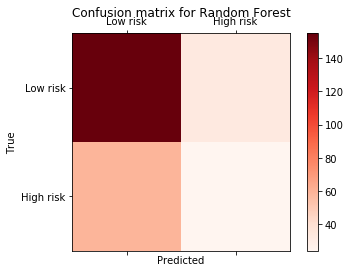

Logistic Regression
Accuracy is: 0.727
precision is: 0.696
recall is: 0.193


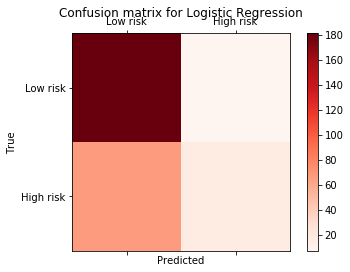

In [68]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

In [69]:
print ("confusion_matrix is: ")
cm = confusion_matrix(y_test, best_RF_model.predict(X_test))
cmDF = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_0', 'true_1'])
print(cmDF)

confusion_matrix is: 
        pred_0  pred_1
true_0     155      33
true_1      59      24


In [70]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

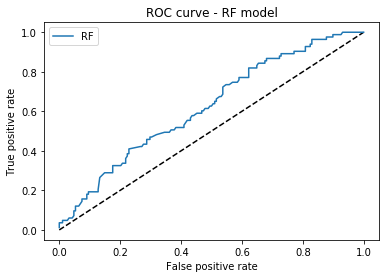

In [71]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [72]:
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
RetirementSavingHigh: 1.3314
RetirementSavingMid: 0.699
NotInPaid: -0.5845
Employeed: -0.4076
Age60: 0.3147
DebtMid: -0.2769
AssetHigh: 0.276
Age70: 0.2645
IncomeModerate: 0.2371
AssetMid: -0.1224
EducationLessCol: -0.0792
Age50: -0.0732


In [73]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      X.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L2) Coefficients
RetirementSavingHigh: 1.3116
RetirementSavingMid: 0.6849
NotInPaid: -0.6278
Employeed: -0.4263
Age60: 0.3241
DebtMid: -0.2988
Age70: 0.2792
AssetHigh: 0.2637
IncomeModerate: 0.2481
AssetMid: -0.1512
EducationLessCol: -0.1029
Age50: -0.0874


In [74]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), X.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
RetirementSavingHigh: 0.1425
EducationLessCol: 0.1229
IncomeModerate: 0.0946
AssetHigh: 0.0906
AssetMid: 0.0861
Employeed: 0.082
Age50: 0.0777
DebtMid: 0.0667
Age60: 0.0667
Age70: 0.0658
NotInPaid: 0.0533
RetirementSavingMid: 0.0509
